Creating Matches
----------------

One of the capabilities of the library is to create a match between two strategies. Strategies are implemented in
the library as `classes`. A list of all the implemented strategies in the library can be found here: https://axelrod.readthedocs.io/en/stable/reference/strategy_index.html

For now we are going to use two simple strategies to demonstrate how we create a `match`.
A match is often useful when designing new strategies in order to study how they perform against specific opponents.

So for example let us create a 5 turns match between `Cooperator` and `Random`. 

`Cooperator` is a strategy designed to cooperate and each turn, and `Random` is a strategy that cooperates at teach turn with a probability of `0.5`.

In [1]:
import axelrod as axl

In [2]:
axl.__version__

'4.14.0'

In [3]:
players = [axl.Cooperator(), axl.Random()]
match = axl.Match(players, turns=5, seed=0)
results = match.play()
results

[(C, D), (C, C), (C, C), (C, D), (C, D)]

The first elemeent of each tuple is the action made by `Cooperator` and the second one by `Random`. Indeed we can see that `Cooperator` played C for all five turns.

`Random` is a stochastic strategy and its actions depend on a probability. We can see that the strategy cooperated only on the third and fourth turn.

The match between the two strategies is being seeded. That is because of the line `seed=0`. This means that no matter how many times you run the above match the results will remain the same.

`Random` is a stochastic strategy and thus the actions of the strategy can be different even for the same opponent! We can see this by running a match with a different seed.

In [4]:
players = [axl.Cooperator(), axl.Random()]
match = axl.Match(players, turns=5, seed=1)
results = match.play()
results

[(C, C), (C, D), (C, D), (C, C), (C, D)]

Now `Random` also cooperated on the first turn. Try and change the seed and see other behaviours of the strategy.

There are several measures that can be obtained from a match. Let us consider the match between the strategies for `seed=0`

In [5]:
players = [axl.Cooperator(), axl.Random()]
match = axl.Match(players, turns=5, seed=0)
results = match.play()

We can view the scores each strategy received at each turn. The first element of the tuples correspond to `Cooperator`.

In [6]:
scores = match.scores()
scores

[(np.int64(0), np.int64(5)),
 (np.int64(3), np.int64(3)),
 (np.int64(3), np.int64(3)),
 (np.int64(0), np.int64(5)),
 (np.int64(0), np.int64(5))]

Note that these scores correspond to the Prisoner's Dilemma (PD) payoffs as presented in [An introduction to game theory and the Iterated Prisoner's Dilemma](1.%20Introduction.ipynb). Thus, in each turn of the match the strategies play a PD game.

In [7]:
axl.game.Game()

Axelrod game: (R,P,S,T) = (np.int64(3), np.int64(1), np.int64(0), np.int64(5))

The PD is set as the default game in the library. However, it is possible to use a different game.
More information can be found on the online documentation of the Axelrod project, and specifically at [Using and playing different stage games](https://axelrod.readthedocs.io/en/stable/how-to/use_different_stage_games.html#use-different-stage-games).

The final scores of a match, which are the sum of the scores per turn.

In [8]:
match.final_score()

(np.int64(6), np.int64(21))

The average score achieved per turn.

In [9]:
match.final_score_per_turn()

(np.float64(1.2), np.float64(4.2))

The winner.

In [10]:
match.winner()

Random: 0.5

The number of cooperations.

In [11]:
match.cooperation()

(5, 2)

The normalised number of cooperations.

In [12]:
match.normalised_cooperation() 

(1.0, 0.4)

EXERCISE
--------
Use the `Match` class to create the following matches:
    
- 5 turns match Cooperator vs Defector 
- 10 turns match Tit For Tat vs Grumpy

Creating Tournaments
-----------------------

Remember the library was created to study the interactions between strategies in a round robin tournament. A tournament where each strategy plays against all opponents. The strategy with the highest score is the winner of the tournament. Here we will cover how we can easily create a very simple IPD tournament.

Here we create a list of players. 


**Reminder:** The full list of all the implemented strategies can be found [here](http://axelrod.readthedocs.io/en/latest/reference/all_strategies.html).

In [13]:
players = [axl.Cooperator(), axl.Defector(), axl.Random(),
           axl.TitForTat(), axl.Grumpy(), axl.Alternator()]

We can now create a tournament, play it, save the results and view the rank of each player:

In [14]:
tournament = axl.Tournament(players=players, seed=1)
tournament.turns # default value of turns

200

In [15]:
tournament.repetitions # default value of repetitions

10

In [16]:
results = tournament.play()

Analysing: 100%|█████████████████████████████████████████████████████████████████████| 25/25 [00:00<00:00, 786.78it/s]


Similar to the matches the tournaments include several result measures. For example the strategies ranked by their average score per turn.

In [17]:
winners = results.ranked_names

In [18]:
winners

['Defector',
 'Alternator',
 'Random: 0.5',
 'Tit For Tat',
 'Grumpy: Nice, 10, -10',
 'Cooperator']

The winner of the tournament is the strategies at index 0 which in our example is Defector.

In [19]:
winners[0]

'Defector'

The scores achieved by each strategy at each repetition.

In [20]:
scores = results.scores
scores

[[1794, 1782, 1779, 1830, 1782, 1806, 1776, 1854, 1812, 1779],
 [2696, 2664, 2648, 2644, 2676, 2628, 2648, 2644, 2636, 2628],
 [2093, 2650, 2555, 2577, 2609, 2564, 2576, 2562, 2581, 2617],
 [2355, 2376, 2327, 2339, 2366, 2336, 2321, 2333, 2329, 2343],
 [2164, 1989, 1987, 2007, 2010, 1998, 2013, 1992, 1992, 2001],
 [2656, 2641, 2696, 2619, 2667, 2698, 2635, 2616, 2644, 2648]]

In [21]:
for i, player in enumerate(players):
    print(f'{player.name}:', scores[i])
    print("========================================================================")
    

Cooperator: [1794, 1782, 1779, 1830, 1782, 1806, 1776, 1854, 1812, 1779]
Defector: [2696, 2664, 2648, 2644, 2676, 2628, 2648, 2644, 2636, 2628]
Random: [2093, 2650, 2555, 2577, 2609, 2564, 2576, 2562, 2581, 2617]
Tit For Tat: [2355, 2376, 2327, 2339, 2366, 2336, 2321, 2333, 2329, 2343]
Grumpy: [2164, 1989, 1987, 2007, 2010, 1998, 2013, 1992, 1992, 2001]
Alternator: [2656, 2641, 2696, 2619, 2667, 2698, 2635, 2616, 2644, 2648]


We can also plot the results.

In [22]:
%matplotlib inline

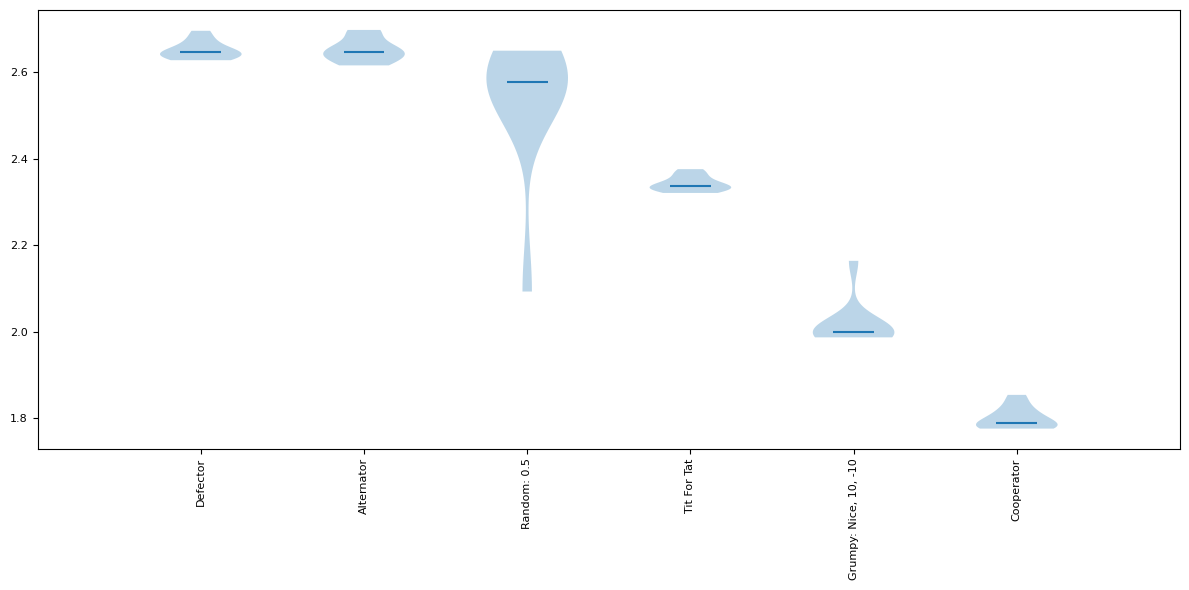

In [23]:
plot = axl.Plot(results)
p = plot.boxplot()

The above plot shows several things.

1. The ranks of the strategies. From left to right the strategies are ordered based on their performance. Defector is first and thus is the winner of the tournament. Cooperator is last and thus came last in the tournament.

2. The distributions of the average score each strategy achieved. Random has the more variation in its distribution and thus the strategy has many different scores each time the tournament was repeated. As a reminder the tournament was repeated 10 times.

EXERCISE
--------

Create your own tournament using any five players from the library and take a look at the ranked names and plot the scores.

Adding Noise
--------

A common variation in iterated prisoner’s dilemma matches is the introduction of noise. That is, each player's action has a given probability of being flipped (e.g., cooperation becomes defection, and vice versa). Noise can be added to both individual matches and tournaments.

To include noise, specify the input argument `noise`. For example, consider a match between two strategies: `GTFT` and `ZDExort2`. In a match without noise, these strategies simply cooperate for the given number of turns.

In [24]:
players = [axl.GTFT(), axl.ZDExtort2()]

match = axl.Match(players, turns=7, noise=0.0, seed=2)
match.play()

[(C, C), (C, C), (C, C), (C, C), (C, C), (C, C), (C, C)]

However, once we allow for noise, you can see that `GTFT` defects in the first round, which then triggers defections from the extortionate player.

In [25]:
players = [axl.GTFT(), axl.ZDExtort2()]

match = axl.Match(players, turns=7, noise=0.01, seed=2)
match.play()

[(C, C), (C, C), (C, C), (C, C), (C, C), (C, C), (C, C)]

Probabilistic Ending
---------------------

Another variation in matches and tournaments is when each match does not last for a known number of turns. Instead, at each turn, there is a probability that the match will end. We refer to this probability as `prob_end`.

In the literature, this is also commonly referred to using the continuation probability, which is the opposite: the probability that the match will continue for another round.

To create a match with probabilistic ending, simply pass the argument `prob_end`.

In [26]:
players = [axl.GTFT(), axl.ZDExtort2()]

match = axl.Match(players, prob_end=0.9, seed=2)
match.turns

inf

You can see now that the number of turns for the `Match` is set to `inf`. This is because it has not yet been determined how many rounds the match will last. This is handled dynamically as the package simulates the match.

In [27]:
match.play()

[(C, C)]

In [28]:
players = [axl.GTFT(), axl.ZDExtort2()]

match = axl.Match(players, prob_end=0.1, seed=2)
match.play()

[(C, C), (C, C), (C, C), (C, C), (C, C), (C, C)]

EXERCISE
--------

Create your own tournaments with noise and probabilistic ending.

Summary
--------

This section has discussed:

- Creating a match
- and creating various tournaments.

In the next section we will send some time looking at implementing our own strategies.